<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025_3_ava/blob/main/FICCD_Claudomiro_ativ_3_2_Explorando_RNs_CNN_RNN_Word_embeddings_RB_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 3.2 - Explorando redes neurais; CNN; RNN; Exploring word embeddings
](https://docs.google.com/presentation/d/1ADvVDuznobgFlgODelLg3_bjvkTvkGPLmVnuyVObEjU/edit?slide=id.p#slide=id.p)**

**Belém, 02 de julho de 2025.**

In [45]:
import torch

#####**A)**

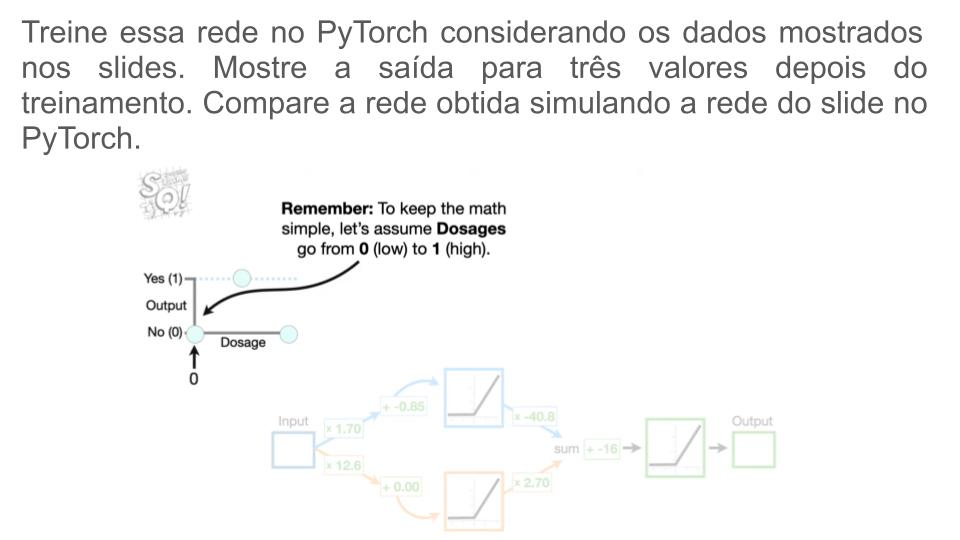

In [46]:
# Dados treinamento
X = torch.tensor([[0.0], [0.5], [1.0]])
y = torch.tensor([[0.0],[1.0], [0.0]])

# Pesos e bias
w1 = torch.tensor([[1.7], [12.6]], requires_grad=True)  # pesos camada oculta
b1 = torch.tensor([-0.85, 0.0], requires_grad=True)    # bies camada oculta
w2 = torch.tensor([[-40.8, 2.7]], requires_grad=True)   # pesos camada saída
b2 = torch.tensor([-16.0], requires_grad=True)           # bias camada saída

# Rede sem treinamento
doses = torch.tensor([[0.0], [0.5], [1.0]])
oculta_slide = torch.relu(doses @ w1.t() + b1)
slide_saida = torch.relu(oculta_slide @ w2.t() + b2)

print("\nSaída da rede mostada no slide, antes de treinar:")
print(slide_saida.detach().numpy().flatten())
print("_________________________________________________\n")

# Hiperparâmetros
learning_rate = 0.01
epochs = 100

# Atualizar os pesos
optimizer = torch.optim.SGD([w1, b1, w2, b2], lr=learning_rate)

# Treinamento
for epoch in range(epochs):
  # Forward pass
  oculta = torch.relu(X @ w1.t() + b1)
  saida = torch.relu(oculta @ w2.t() + b2)

  # Cálculo da perda MSE
  loss = torch.mean((saida - y) ** 2)

  # Backpropagation

  # Zerar os gradientes
  optimizer.zero_grad()

  #w1.grad.zero_()
  #b1.grad.zero_()
  #w2.grad.zero_()
  #b2.grad.zero_()

  # Novos gradients
  loss.backward()

  # Atualização dos parâmetros
  optimizer.step()

  #w1.data -= learning_rate * w1.grad
  #b1.data -= learning_rate * b1.grad
  #w2.data -= learning_rate * w2.grad
  #b2.data -= learning_rate * b2.grad

  if epoch % 10 == 0:
    print(f"Epoch {epoch}, Loss: {loss.item():.15f}")

# Rede treinada
oculta_treinada = torch.relu(X @ w1.t() + b1)
treinada_saida = torch.relu(oculta_treinada @ w2.t() + b2)

print("\nSaída da rede treinada:")
print(treinada_saida.detach().numpy().flatten())


Saída da rede mostada no slide, antes de treinar:
[0.        1.0100002 0.       ]
_________________________________________________

Epoch 0, Loss: 0.000033334858017
Epoch 10, Loss: 0.000000010488293
Epoch 20, Loss: 0.000000000004851
Epoch 30, Loss: 0.000000000001213
Epoch 40, Loss: 0.000000000001213
Epoch 50, Loss: 0.000000000000000
Epoch 60, Loss: 0.000000000000000
Epoch 70, Loss: 0.000000000000000
Epoch 80, Loss: 0.000000000000000
Epoch 90, Loss: 0.000000000000000

Saída da rede treinada:
[0. 1. 0.]


**Análise:**

Para a rede não treinada:
* O segundo valor está levemente acima de 1;
* Isso acontece porque os pesos fixos do slide não foram treinados, mas já estavam bem perto de uma boa solução.

Para a rede treinada:
* A perda MSE começa pequena, indicando que a rede já estava bem próxima da saída desejada antes de treinar;
* Com 40 épocas aproximadamente, a perda cai para 0, isso indica que a rede aprendeu com sucesso os 3 pontos de treinamento;
* Agora a rede mostra exatamente o que deveria mostrar (0 pra dose 0, 1 pra dose 0.5, 0 pra dose 1), corrigindo o erro do ponto do meio;
* Os pesos foram ajustados no treinamentyo;
* Como tem apenas 3 pontos exatos e a rede tem 2 neurônios na camada oculta, ela aprende com facilidade.

**Conclusão:**

* O pequeno erro na rede não treinada (1.0100002) mostra que ela simula bem a ideia da função desejada, mas o treinamento é necessário para fazer melhor o ajuste;
* A RN com ReLU consegue aprender com sucesso o padrão dos dados do slide;
* Com poucos dados o treinamento converge rapidamente.


#####**B)** *Simule a rede mostrada no próximo slide no PyTorch. Obtenha a saída para cinco valores de cada feature. Retire do dataset da Iris. Em seguida aplique as funções argmax e softmax, e interprete os resultados. Calcule a cross entropy.*

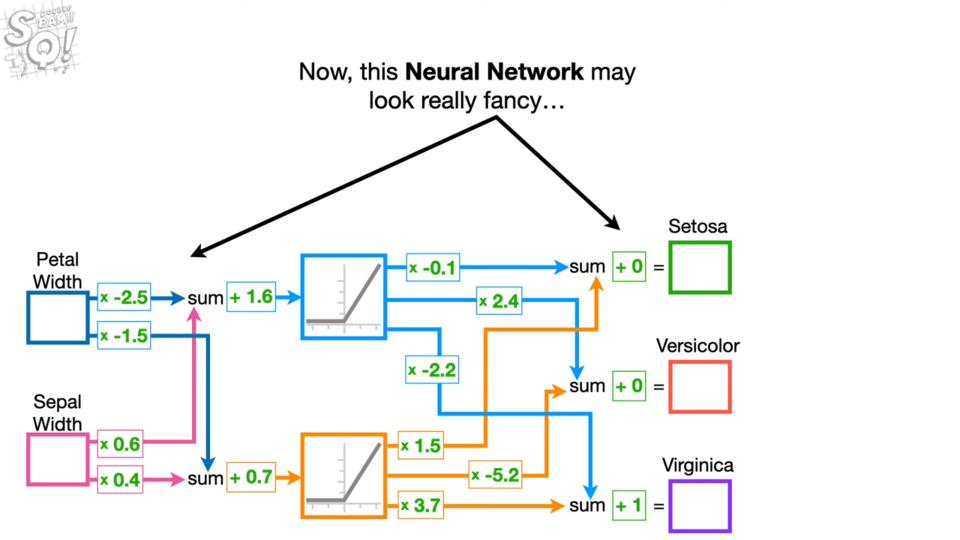